<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1、方差分析" data-toc-modified-id="1、方差分析-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>1、方差分析</a></span></li><li><span><a href="#2、方差分析模型的参数估计" data-toc-modified-id="2、方差分析模型的参数估计-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>2、方差分析模型的参数估计</a></span></li></ul></li></ul></div>

In [8]:
import os 
import math
import pandas as pd

pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [9]:
path = "../data"
data_shop=pd.read_excel(os.path.join(path,"merge_shop_coupon_nm.xlsx"),encoding="utf-8")

In [10]:
data_shop.head()

,店名,关键词,城市,评分,评价数,人均,地址,营业时间,菜名,商家等级,购买人数,团购价
0,老北京涮羊肉,火锅,xa,4.40,877,45.50,西安市雁塔区朱雀大街250号东方大酒店西门斜对面（子午路站下车向北走60米路西）,11:00-21:00,【羊肉】【豆腐】【麻酱】【精品肥牛】【粉丝】【羔羊肉】【牛肚】【油豆皮】【香菇】【豆皮】【土...,2,1692,118.50
1,大龙燚火锅(粉巷店),火锅,xa,4.60,2253,100.00,西安市碑林区粉巷南院门15A南苑中央广场食尚南苑2F,周一至周日 10:00-21:00,【麻辣排骨】【千层毛肚】【鸳鸯锅】【鸭血】【天味香肠】【薄土豆】【功夫黄瓜】【清汤锅】【印度...,2,19584,88.00
2,鲜上鲜文鱼庄(凤城五路店),火锅,xa,4.50,1398,56.00,西安市未央区凤城五路地铁D口出人人乐5楼,全天,【生菜】【鸳鸯锅】【千叶豆腐】【荷包豆腐】【生鱼片】【毛肚】【文鱼】【鱼丸】【撒尿牛丸】【山...,2,11798,52.00
3,蜜悦士鲜牛肉时尚火锅(凯德广场店),火锅,xa,4.40,48,63.00,西安市雁塔区南二环凯德广场四楼东南角,10:00-21:00,【吊龙伴】【三花腱】【番茄锅】【招牌牛舌】【油豆皮】【油炸豆腐皮】【菌汤鸳鸯锅】【手工面】【...,2,40,59.90
4,大自在火锅(和平村店),火锅,xa,4.30,214,84.00,西安市莲湖区三桥和平村十字西南角伯乐城市广场6层,暂无时间,【蔬菜拼盘】【黄豆芽】【虾饺】【撒尿牛肉丸】【油条】【毛肚】【自在小酥肉】【鸡爪】【自在嫩牛...,2,1282,59.50


In [11]:
data_shop.shape

(197, 12)

In [12]:
for i in range(0,197):
    data_shop.iloc[i,10]=math.log(data_shop.iloc[i,10])

In [13]:
data_shop.dtypes

店名       object
关键词      object
城市       object
评分      float64
评价数       int64
人均      float64
地址       object
营业时间     object
菜名       object
商家等级      int64
购买人数    float64
团购价     float64
dtype: object

In [14]:
评分_g=[0,4,4.5,5]
data_shop["评分_g"]=pd.cut(data_shop.评分,评分_g,labels=["小于4分","4-4.5分","4.5-5分"])

In [15]:
data_shop.head()

,店名,关键词,城市,评分,评价数,人均,地址,营业时间,菜名,商家等级,购买人数,团购价,评分_g
0,老北京涮羊肉,火锅,xa,4.40,877,45.50,西安市雁塔区朱雀大街250号东方大酒店西门斜对面（子午路站下车向北走60米路西）,11:00-21:00,【羊肉】【豆腐】【麻酱】【精品肥牛】【粉丝】【羔羊肉】【牛肚】【油豆皮】【香菇】【豆皮】【土...,2,7.43,118.50,4-4.5分
1,大龙燚火锅(粉巷店),火锅,xa,4.60,2253,100.00,西安市碑林区粉巷南院门15A南苑中央广场食尚南苑2F,周一至周日 10:00-21:00,【麻辣排骨】【千层毛肚】【鸳鸯锅】【鸭血】【天味香肠】【薄土豆】【功夫黄瓜】【清汤锅】【印度...,2,9.88,88.00,4.5-5分
2,鲜上鲜文鱼庄(凤城五路店),火锅,xa,4.50,1398,56.00,西安市未央区凤城五路地铁D口出人人乐5楼,全天,【生菜】【鸳鸯锅】【千叶豆腐】【荷包豆腐】【生鱼片】【毛肚】【文鱼】【鱼丸】【撒尿牛丸】【山...,2,9.38,52.00,4-4.5分
3,蜜悦士鲜牛肉时尚火锅(凯德广场店),火锅,xa,4.40,48,63.00,西安市雁塔区南二环凯德广场四楼东南角,10:00-21:00,【吊龙伴】【三花腱】【番茄锅】【招牌牛舌】【油豆皮】【油炸豆腐皮】【菌汤鸳鸯锅】【手工面】【...,2,3.69,59.90,4-4.5分
4,大自在火锅(和平村店),火锅,xa,4.30,214,84.00,西安市莲湖区三桥和平村十字西南角伯乐城市广场6层,暂无时间,【蔬菜拼盘】【黄豆芽】【虾饺】【撒尿牛肉丸】【油条】【毛肚】【自在小酥肉】【鸡爪】【自在嫩牛...,2,7.16,59.50,4-4.5分


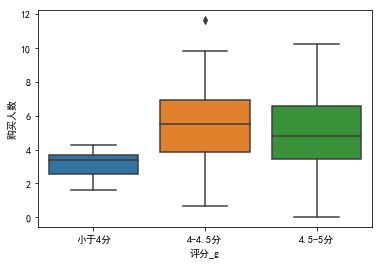

In [16]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
import seaborn as sns
sns.boxplot(x='评分_g',y='购买人数',data=data_shop)
plt.show()


## 1、方差分析

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
data_shop_anova=sm.stats.anova_lm(ols("购买人数~C(评分_g)",data_shop).fit())

In [19]:
print(data_shop_anova)

             df  sum_sq  mean_sq    F  PR(>F)
C(评分_g)    2.00   52.32    26.16 5.41    0.01
Residual 193.00  933.60     4.84  nan     nan


## 2、方差分析模型的参数估计

In [20]:
formula='购买人数~C(评分_g)'
data_shop_est=ols(formula,data_shop).fit()
print(data_shop_est.summary())

                            OLS Regression Results                            
Dep. Variable:                   购买人数   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.408
Date:                Sat, 13 Jul 2019   Prob (F-statistic):            0.00519
Time:                        14:55:40   Log-Likelihood:                -431.08
No. Observations:                 196   AIC:                             868.2
Df Residuals:                     193   BIC:                             878.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.1276      0.66

In [21]:
formula='购买人数~C(评分_g)-1'
data_shop_est1=ols(formula,data_shop).fit()
print(data_shop_est1.summary())

                            OLS Regression Results                            
Dep. Variable:                   购买人数   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.408
Date:                Sat, 13 Jul 2019   Prob (F-statistic):            0.00519
Time:                        14:55:40   Log-Likelihood:                -431.08
No. Observations:                 196   AIC:                             868.2
Df Residuals:                     193   BIC:                             878.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(评分_g)[小于4分]       3.1276      0.663     

In [22]:
formula='购买人数~C(评分_g)+C(关键词)+C(城市)'
data_shop_anova1=sm.stats.anova_lm(ols(formula,data=data_shop).fit(),typ=3)

In [23]:
print(data_shop_anova1)

           sum_sq     df     F  PR(>F)
Intercept   78.52   1.00 16.75    0.00
C(评分_g)     47.49   2.00  5.07    0.01
C(关键词)      37.52   1.00  8.01    0.01
C(城市)        0.13   1.00  0.03    0.87
Residual   895.16 191.00   nan     nan


In [24]:
formula='购买人数~C(评分_g)+C(关键词)'
data_shop_anova2=sm.stats.anova_lm(ols(formula,data=data_shop).fit(),typ=3)
print(data_shop_anova2)

           sum_sq     df     F  PR(>F)
Intercept   92.91   1.00 19.92    0.00
C(评分_g)     48.61   2.00  5.21    0.01
C(关键词)      38.30   1.00  8.21    0.00
Residual   895.29 192.00   nan     nan


In [25]:
data_shop_anova1_set=ols(formula,data=data_shop).fit()
print(data_shop_anova1_set.summary())

                            OLS Regression Results                            
Dep. Variable:                   购买人数   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     6.478
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           0.000337
Time:                        14:55:41   Log-Likelihood:                -426.98
No. Observations:                 196   AIC:                             862.0
Df Residuals:                     192   BIC:                             875.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9236      0.65